In [42]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Hw2.3.csv")

In [13]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [17]:
df.shape

(550, 7)

## Про скільки книг зберігає дані датасет?
## Відповідь: 550 книг

In [20]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [22]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

## Чи є в якихось змінних пропуски? (Так / ні)
## Відповідь: Ні

In [30]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

## Які є унікальні жанри?
## Відповідь: Non Fiction, Fiction

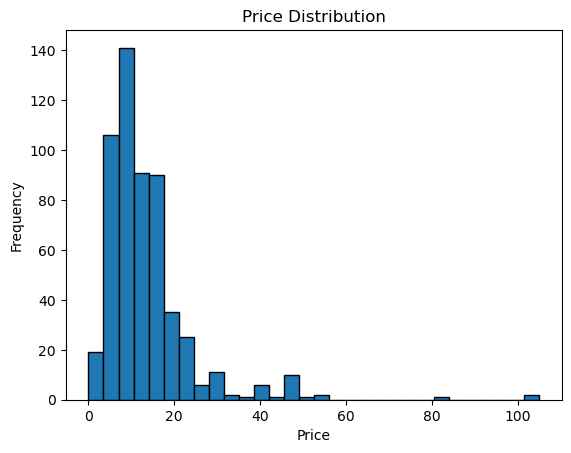

In [56]:
df['price'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [60]:
df["price"].max()

105

## Максимальна ціна?
## Відповідь: 105

In [62]:
df["price"].min()

0

## Мінімальна ціна?
## Відповідь: 0

In [64]:
df["price"].mean()

13.1

## Середня ціна?
## Відповідь: 13.1

In [66]:
df["price"].median()

11.0

## Медіана ціна?
## Відповідь: 11.0

In [78]:
max_rating = df["user_rating"].max()
max_rating

4.9

## Який рейтинг у датасеті найвищий?
## Відповідь: 4.9

In [138]:
df[df["user_rating"] == max_rating].shape[0]

52

## Скільки книг мають такий рейтинг?
## Відповідь: 52

In [96]:
df[df["reviews"] == df["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


## Яка книга має найбільше відгуків?
## Відповідь: Where the Crawdads Sing

In [136]:
books_in_2015 = df[df["year"] == 2015]
top_50_in_2015 = books_in_2015.sort_values(by="reviews", ascending=False).head(50)
top_50_in_2015[top_50_in_2015["price"] == top_50_in_2015["price"].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


## З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
## Відповідь: Publication Manual of the American Psychologic...

In [142]:
fiction_books_in_2010 = df[(df["year"] == 2010) & (df["genre"] == "Fiction")]
top_50_fiction_2010 = fiction_books_in_2010.nlargest(50, "reviews")
top_50_fiction_2010.shape[0]

20

## Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році
## Відповідь: 20

In [153]:
books_max_rating = df[df["user_rating"] == 4.9]
books_max_rating[books_max_rating["year"].isin([2010, 2011])].shape[0]

1

## Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках
## Відповідь: 1

In [164]:
df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(by="price")

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


## Яка книга остання у відсортованому списку?
## Відповідь: Old School (Diary of a Wimpy Kid #10)

In [183]:
genres_df = df.groupby("genre")
genres_df["price"].agg(["max", "min"]).reset_index()

,genre,max,min
0,Fiction,82,0
1,Non Fiction,105,0


## Максимальна ціна для жанру Fiction
## Відповідь: 82
## Мінімальна ціна для жанру Fiction
## Відповідь: 0
## Максимальна ціна для жанру Non Fiction
## Відповідь: 105
## Мінімальна ціна для жанру Non Fiction
## Відповідь: 0

In [191]:
authors_df = df.groupby("author")
books_authors_df = authors_df["name"].agg("count").reset_index()
books_authors_df.columns = ["author", "books_count"]
books_authors_df.shape[0]

248

## Якої розмірності вийшла таблиця?
## Відповідь: 248

In [200]:
books_authors_df.loc[books_authors_df["books_count"].idxmax()]

author         Jeff Kinney
books_count             12
Name: 120, dtype: object

## Який автор має найбільше книг?
## Відповідь: Jeff Kinney
## Скільки книг цього автора?
## Відповідь: 12

In [208]:
mean_book_rating_authors_df = authors_df["user_rating"].agg("mean").reset_index()
mean_book_rating_authors_df.columns = ["author", "mean_book_rating"]
mean_book_rating_authors_df.loc[mean_book_rating_authors_df["mean_book_rating"].idxmin()]

author              Donna Tartt
mean_book_rating            3.9
Name: 71, dtype: object

## У якого автора середній рейтинг мінімальний?
## Відповідь: Donna Tartt
## Який у цього автора середній рейтинг?
## Відповідь: 3.9

In [ ]:
mean_book_rating_authors_df = mean_book_rating_authors_df.drop(columns=["author"])

In [228]:
mean_rating_count_books_authors_df = pd.concat([books_authors_df, mean_book_rating_authors_df], axis=1)
mean_rating_count_books_authors_df.sort_values(by=['books_count', 'mean_book_rating'], ascending=[True, True])

,author,books_count,mean_book_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


## Який автор перший у списку?
## Відповідь: Muriel Barbery

## Візуалізація

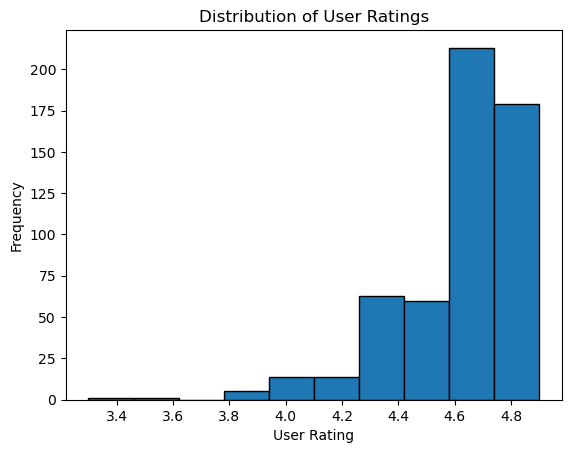

In [248]:
df["user_rating"].plot(kind="hist", bins=10, edgecolor="black")
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.show()

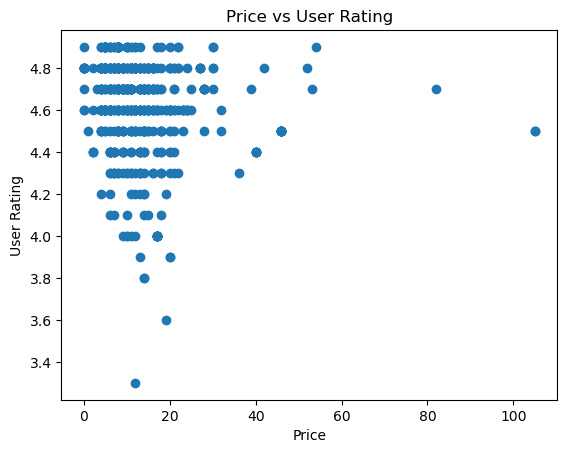

In [250]:
plt.scatter(df["price"], df["user_rating"])
plt.title("Price vs User Rating")
plt.xlabel("Price")
plt.ylabel("User Rating")
plt.show()

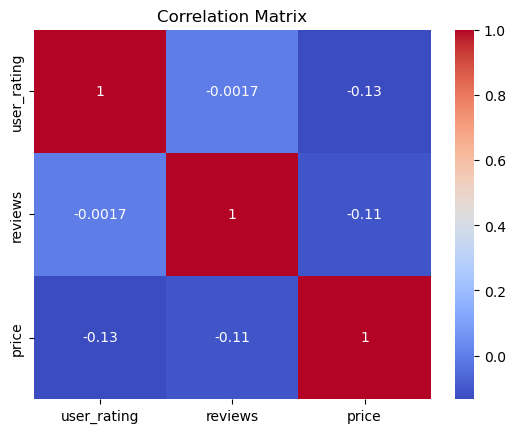

In [252]:
import seaborn as sns
correlation_matrix = df[["user_rating", "reviews", "price"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

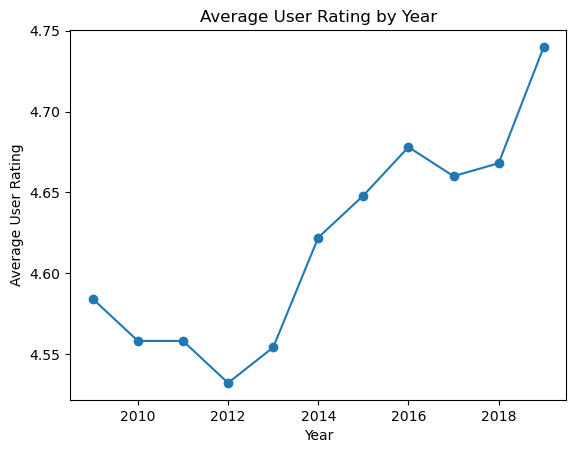

In [254]:
df.groupby("year")["user_rating"].mean().plot(kind="line", marker="o")
plt.title("Average User Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average User Rating")
plt.show()